In [1]:
# Read the csv file and load it into a pandas dataframe.

# Importing the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the diabetes dataset
df = pd.read_csv('/Users/viedamayanti/Desktop/Data-Glacier-Data-Analyst-Intern/Week4/diabetes.csv') 

In [3]:
# Exploratory Data Analysis (EDA)
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Data Understanding: I read the dataset and understand what each feature represents. What is the potential relevance feature for diabetes prediction.

Feature relevance for diabetes:

•	Glucose Levels: Among the most critical predictors for diabetes.

•	BMI (Body Mass Index): High BMI often correlates with diabetes risk.

•	Age: Age can be a significant factor in diabetes risk assessment.

•	Insulin Levels: Relevant but might have multicollinearity with other features.

•	Pregnancies: Relevant for gestational diabetes prediction (in females).

•	Blood Pressure: Can be relevant but might have less direct impact compared to glucose or BMI.

•	Skin Thickness: Might have less direct impact compared to other features.

•	Diabetes Pedigree Function: Measures genetic predisposition, but might have less impact alone.


In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# This format is more easy to understand
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# Check null values
def check_null(df):
    return df.isnull().sum()
print(check_null(df))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
# Check the specific columns before replacement
print(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].head(2))

# Make the replacement
df_copy = df.copy(deep=True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Check the specific columns after replacement
print(df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].head(2))


   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0      148             72             35        0  33.6
1       85             66             29        0  26.6
   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0    148.0           72.0           35.0      NaN  33.6
1     85.0           66.0           29.0      NaN  26.6


In [9]:
check_null(df_copy)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

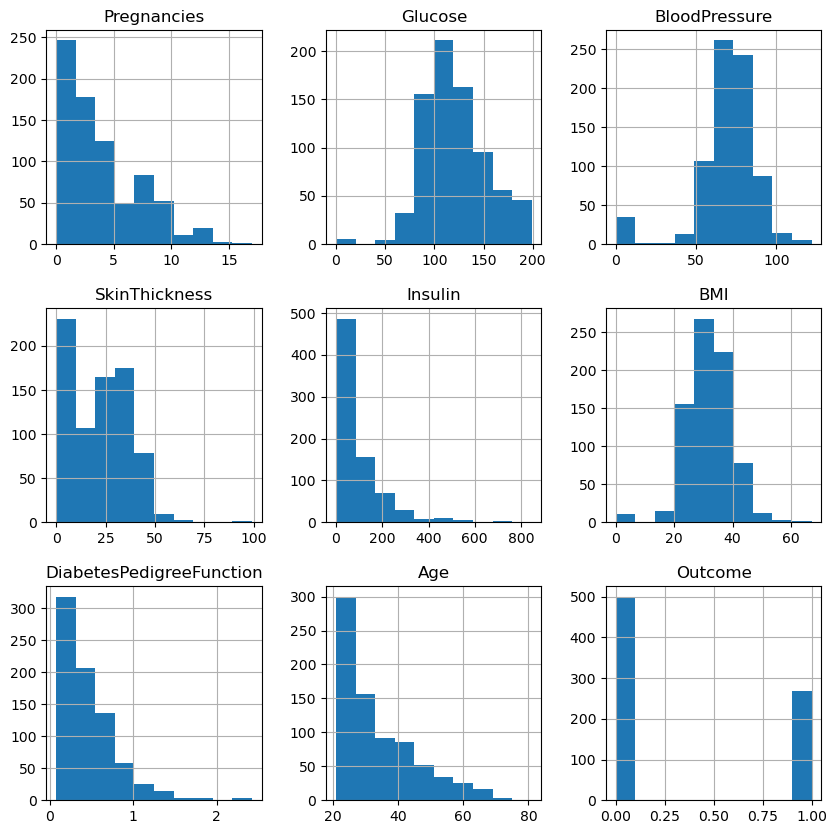

In [10]:
# Data Visualization 
# With NaN values
plot = df.hist(figsize=(10,10))

In [11]:
# As it not supposed to have a NaN dataset then we need to fill up the NaN value either with the mean or median 
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace=True)

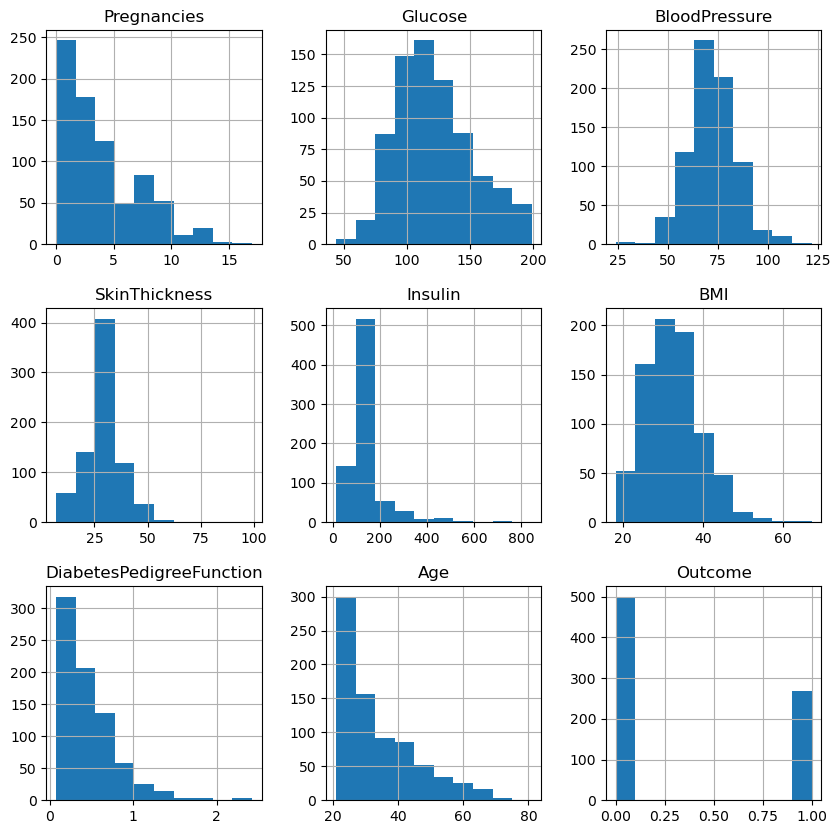

In [12]:
plot = df_copy.hist(figsize=(10,10))

In [13]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


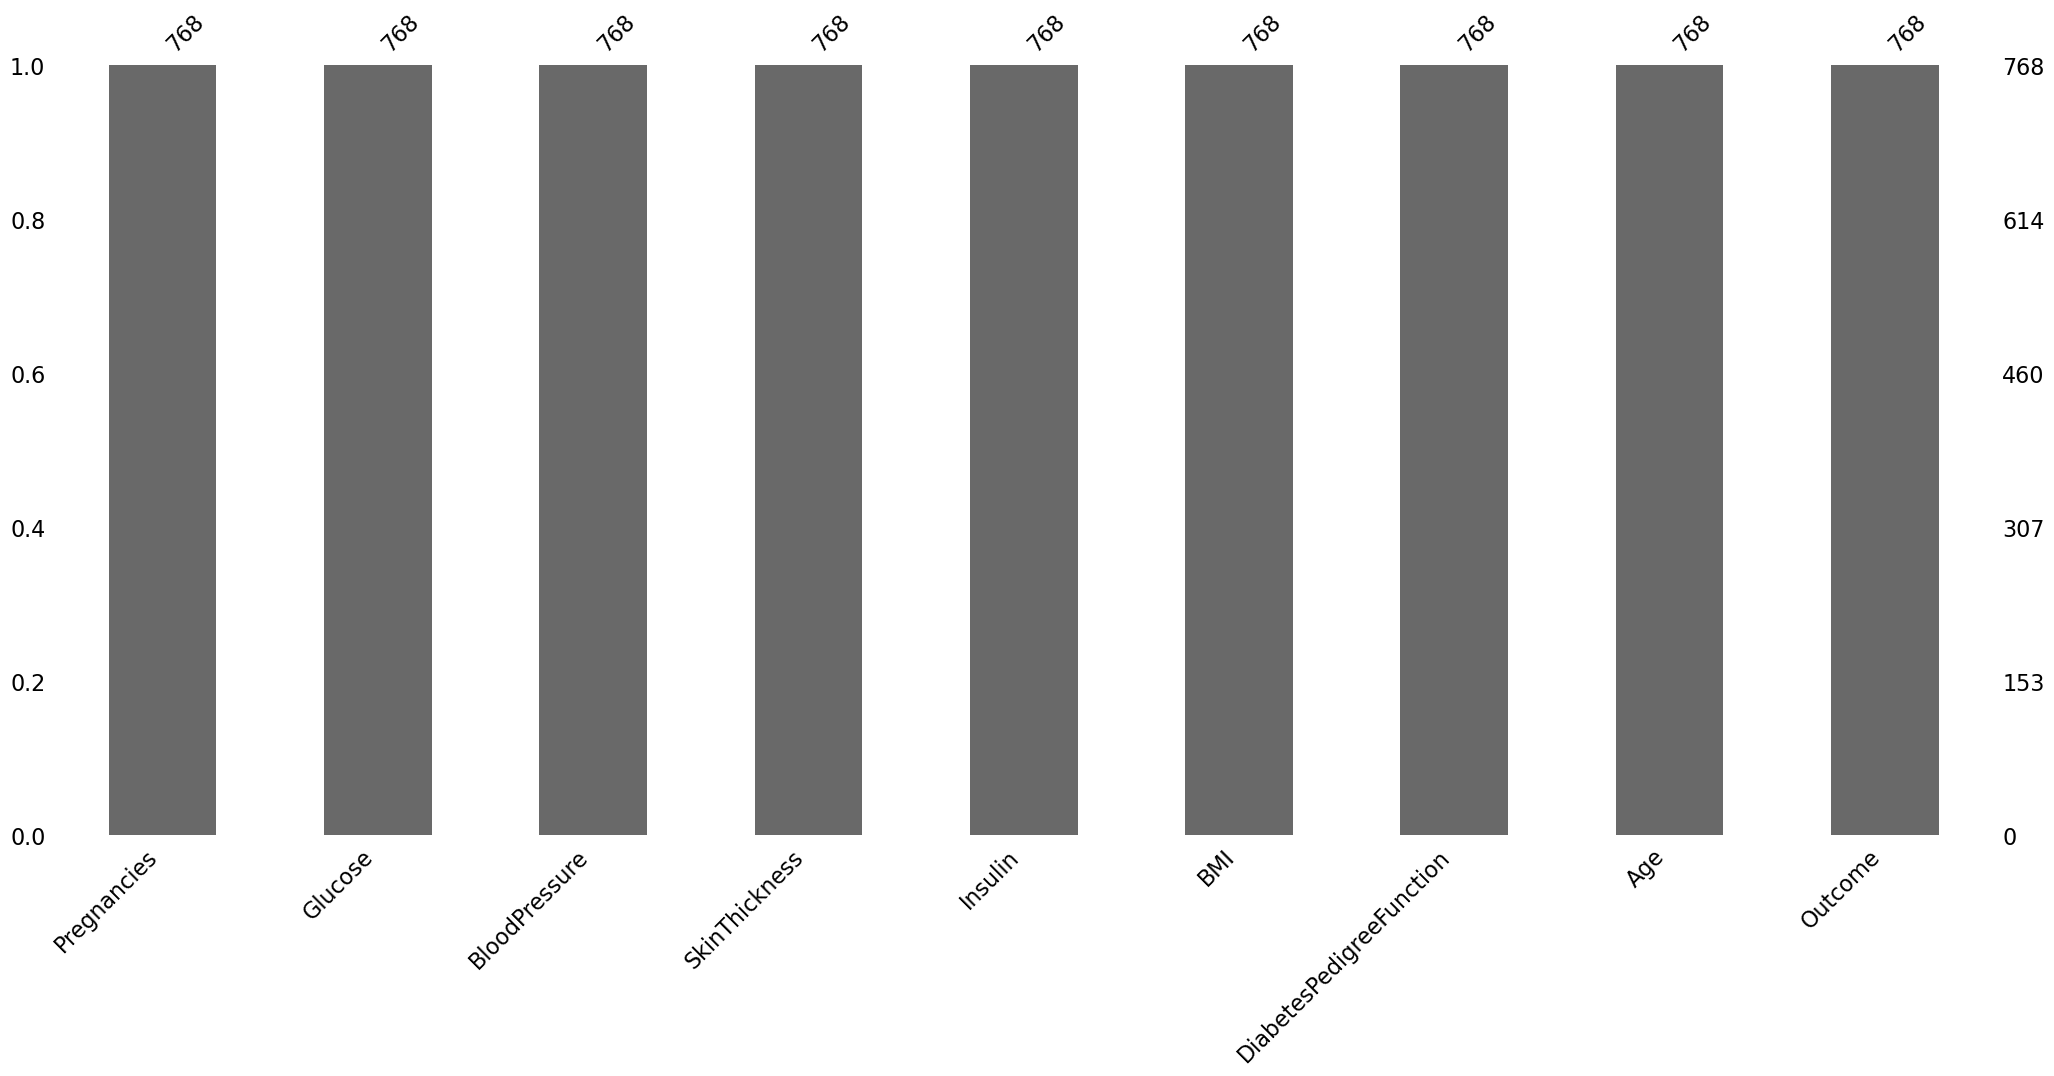

In [14]:
# Plot null values
import missingno as msno
plot = msno.bar(df_copy)

All missing values are filling up

In [15]:
plot_outcome = df['Outcome'].value_counts()
print(plot_outcome)

Outcome
0    500
1    268
Name: count, dtype: int64


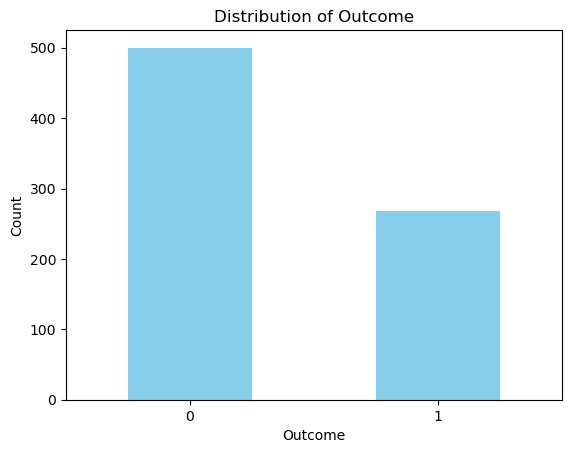

In [16]:
# Plotting the outcome distribution
plot_outcome.plot(kind='bar', color='skyblue')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')
plt.xticks(rotation=0) 
plt.show()

The number of people without diabetes, based on the data, is double that of those with diabetes. '0' indicates non-diabetes while '1' identifies diabetes

In [17]:
# Correlation between all feature 
selected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Compute the correlation matrix
correlation_matrix = df_copy[selected_columns].corr()


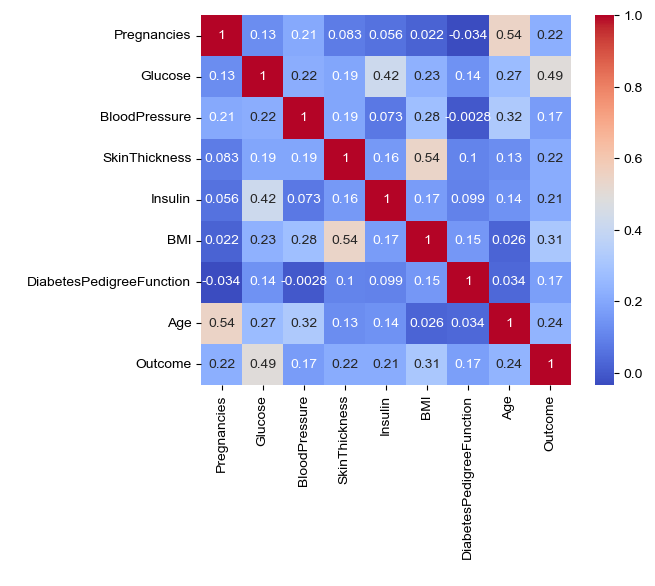

<Figure size 1200x1000 with 0 Axes>

In [18]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
sns.set(font_scale=0.7) 
plt.figure(figsize=(12,10))
plt.show()

Roughly 49% of the features relate to Glucose, while 31% correspond to BMI and their association with the diabetes outcome

In [19]:
# Check duplicate data
df.duplicated().sum()

0

In [20]:
from sklearn.preprocessing import StandardScaler

# Subset the DataFrame with the selected columns
subset_columns = ['Glucose', 'Insulin', 'BMI', 'Age']
df_subset = df[subset_columns]

# Create a scaler and fit_transform only on the subset columns
scaler = StandardScaler()
scaled_data_subset = scaler.fit_transform(df_subset)

# Replace the scaled data back into the original DataFrame
df_scaled_subset = df.copy()  # Make a copy of the original DataFrame
df_scaled_subset[subset_columns] = scaled_data_subset



Splitting the data involves segregating 'y' as the diabetes column, which holds binary values, while 'x' represents the remaining eight columns. In total, there are nine columns

In [21]:
# Data Splitting 
from sklearn.model_selection import train_test_split

In [22]:
y = df_scaled_subset['Outcome']


In [23]:
X = scaled_data_subset


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

80% are data testing and 20% are data testing

In [25]:
# Check Dimension
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (614, 4)
X_test shape:  (154, 4)
y_train shape:  (614,)
y_test shape:  (154,)


In [26]:
# Data Modeling 
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred_logreg = logreg.predict(X_test)


In [28]:
# Classification Reports 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



In [29]:
from sklearn.metrics import accuracy_score
score_logreg = round(accuracy_score(y_test, y_pred_logreg)*100)
print('The accuracy score using Logistic Regression is '+ str(score_logreg) + '%' )

The accuracy score using Logistic Regression is 73%


[[84 16]
 [25 29]]


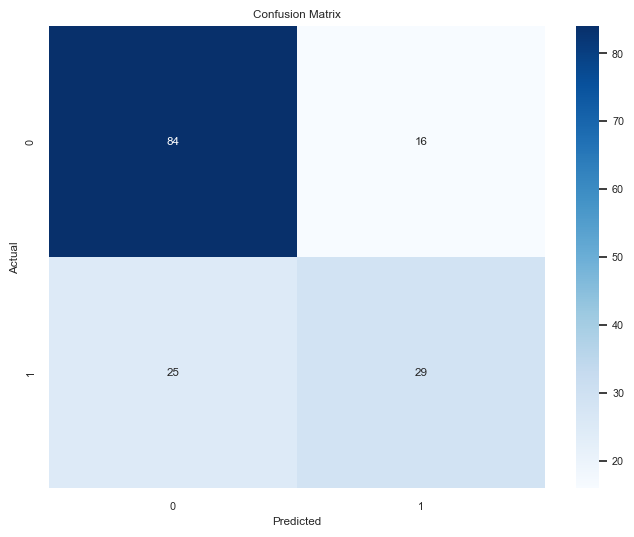

In [30]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_logreg)
print(cm)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# 2. K-Nearest Neighbor KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
train_score = []
test_score = []

for i in range(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))


In [33]:
# Finding the best k value based on test set accuracy
best_k = test_score.index(max(test_score)) + 1
print(f"The best k value is: {best_k}")

The best k value is: 11


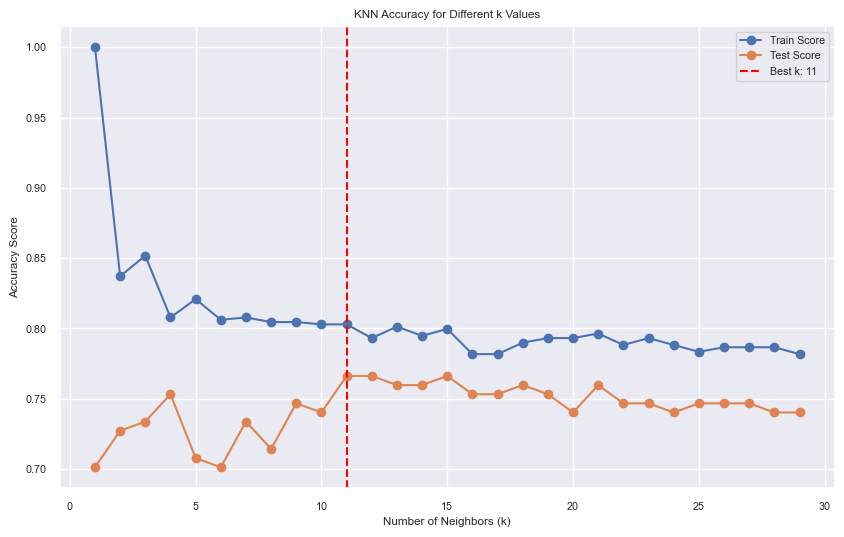

In [34]:
# Plotting the accuracy scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), train_score, label='Train Score', marker='o')
plt.plot(range(1, 30), test_score, label='Test Score', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('KNN Accuracy for Different k Values')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k: {best_k}')
plt.legend()
plt.show()

In [35]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [36]:
# Predicting KNN model 
y_pred_knn = knn.predict(X_test)

In [37]:
# Classification Reports 
print(classification_report(y_test,y_pred_knn))
score_knn = round(accuracy_score(y_test, y_pred_knn)*100)
print(' The accurancy score using KNN is '+ str(score_knn)+ '%')

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.68      0.63      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

 The accurancy score using KNN is 77%


[[84 16]
 [20 34]]


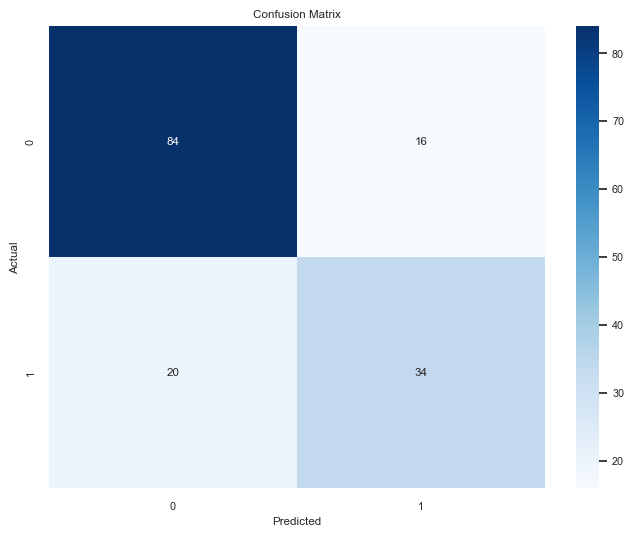

In [38]:
# Confusion matrix with KNN 
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# 3. Support Vector Classifier Algorithm
# Svc kernel = linear 
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
# Predicting SVC model 
y_pred_svc = svc_linear.predict(X_test)

In [41]:
# Classification Reports 
print(classification_report(y_test,y_pred_svc))
score_svc = round(accuracy_score(y_test, y_pred_svc)*100)
print(' The accurancy score using SVC linear is '+ str(score_svc)+ '%')

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.64      0.52      0.57        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154

 The accurancy score using SVC linear is 73%


In [42]:
# Svc kernel = polynomial 
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [43]:
y_pred_poly = svc_poly.predict(X_test)

In [44]:
# Classification Reports 
print(classification_report(y_test,y_pred_poly))
score_poly = round(accuracy_score(y_test, y_pred_poly)*100)
print(' The accurancy score using SVC polynomial is '+ str(score_poly)+ '%')

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       100
           1       0.68      0.24      0.36        54

    accuracy                           0.69       154
   macro avg       0.69      0.59      0.58       154
weighted avg       0.69      0.69      0.64       154

 The accurancy score using SVC polynomial is 69%


In [45]:
# SVC kerne = gaussian 
svc_gauss = SVC(kernel='rbf')
svc_gauss.fit(X_train, y_train)

SVC()

In [46]:
y_pred_gauss = svc_gauss.predict(X_test)

In [47]:
# Classification Reports 
print(classification_report(y_test,y_pred_gauss))
score_gauss = round(accuracy_score(y_test, y_pred_gauss)*100)
print(' The accurancy score using SVC gaussian is '+ str(score_gauss)+ '%')

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.64      0.52      0.57        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154

 The accurancy score using SVC gaussian is 73%


In [48]:
# SVC kernel = sigmoid 
svc_sigm = SVC(kernel='sigmoid')
svc_sigm.fit(X_train, y_train)


SVC(kernel='sigmoid')

In [49]:
y_pred_sigm = svc_sigm.predict(X_test)

In [50]:
# Classification Reports 
print(classification_report(y_test,y_pred_sigm))
score_sigm = round(accuracy_score(y_test, y_pred_sigm)*100)
print(' The accurancy score using SVC sigmoid is '+ str(score_sigm)+ '%')

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       100
           1       0.52      0.46      0.49        54

    accuracy                           0.66       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.65      0.66      0.66       154

 The accurancy score using SVC sigmoid is 66%


In [51]:
# Comparing all the SVC model 
svc_accuracy = {'svc_linear':score_svc, 'svc_polynomial' : score_poly, 'svc_gaussian': score_gauss, 'svc_sigmoid':score_sigm}
svc_accuracy

{'svc_linear': 73, 'svc_polynomial': 69, 'svc_gaussian': 73, 'svc_sigmoid': 66}

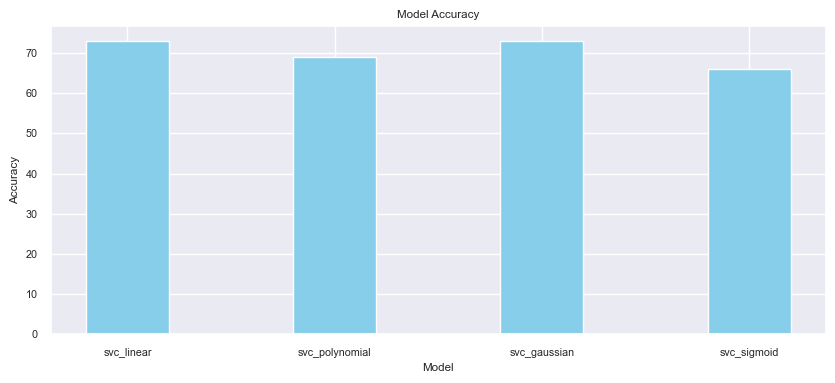

In [52]:
model = list(svc_accuracy.keys())
values = list(svc_accuracy.values())
fig = plt.figure(figsize = (10,4 ))
plt.bar(model, values, width = 0.4, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [53]:
# 4. Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred_nb = nb.predict(X_test)

In [55]:
# Classification Reports 
print(classification_report(y_test,y_pred_nb))
score_nb = round(accuracy_score(y_test, y_pred_nb)*100)
print(' The accurancy score using Naive Bayes is '+ str(score_nb)+ '%')

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

 The accurancy score using Naive Bayes is 70%


In [56]:
# 5. Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [57]:
y_pred_dt = dt.predict(X_test)

In [58]:
# Classification Reports 
print(classification_report(y_test,y_pred_dt))
score_dt = round(accuracy_score(y_test, y_pred_dt)*100)
print(' The accurancy score using Decision Tree is '+ str(score_dt)+ '%')

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.63      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

 The accurancy score using Decision Tree is 73%


In [59]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy',random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [60]:
y_pred_rf = rf.predict(X_test)

In [61]:
# Classification Reports 
print(classification_report(y_test,y_pred_rf))
score_rf = round(accuracy_score(y_test, y_pred_rf)*100)
print(' The accurancy score using Random Forest is '+ str(score_rf)+ '%')

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.62      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

 The accurancy score using Random Forest is 73%


In [62]:
# Comparing all the models 
results_accuracy = {'Logistic regression':score_logreg, 'KNN' : score_knn, 'SVC': score_svc, 'Naive Bayes':score_nb, 'Decision Tree':score_dt, 'Random Forest':score_rf}
results_accuracy


{'Logistic regression': 73,
 'KNN': 77,
 'SVC': 73,
 'Naive Bayes': 70,
 'Decision Tree': 73,
 'Random Forest': 73}

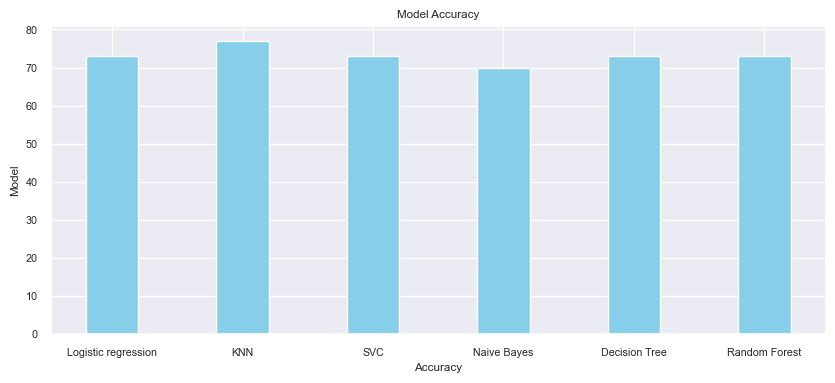

In [63]:
model = list(results_accuracy.keys())
values = list(results_accuracy.values())
fig = plt.figure(figsize = (10, 4))
plt.bar(model, values, width = 0.4, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy')
plt.show()

In [64]:
# Find the model with the maximum accuracy
max_accuracy_model = max(results_accuracy, key=lambda k: results_accuracy[k])
max_accuracy = results_accuracy[max_accuracy_model]

print(f"Model with maximum accuracy is: {max_accuracy_model} - Accuracy: {max_accuracy} %")

Model with maximum accuracy is: KNN - Accuracy: 77 %


In [65]:
import pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pickle.dump(model, open('diabetes_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
